In [1]:
import sys
sys.path.append('..')
import model
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

2. Отдельно пишете скрипт, который :

    2.1. рассчитывает время работы методов на некотором временном отрезке

    2.2. На каждом временном шаге вычисляет норму разницы между решением Верле и odeint и рисует график этой нормы. Графики нужно построить для шага delta t 0.1, 0.01, 0.001.

Отдельно замечу, что odeint должен решать задачу на ВСЕМ временном отрезке, а не на каждом небольшом отрезке длины delta t.

In [2]:
particles_count = 10
masses = np.random.rand(particles_count) * 10
speed_x = np.random.rand(particles_count) * 2
speed_y = np.random.rand(particles_count) * 2
life_times = [10**6] * particles_count
particles = []
coord_x = np.random.rand(particles_count) * 100
coord_y = np.random.rand(particles_count) * 100
for i in range(particles_count):
    particles.append(
        model.Particle(
            x = coord_x[i],
            y = coord_y[i],
            mass = masses[i],
            speed_x = speed_x[i],
            speed_y = speed_y[i],
            life_time = life_times[i]
        )
    )

In [3]:
def count_verle_exec_time(time_step, time_interval):
    verleSolver = model.VerleSimpleSolver(time_step = time_step)
    %timeit res = verleSolver.solve(time_interval = time_interval, particles = particles)
count_verle_exec_time(time_step = 0.1, time_interval = 100)

3.29 s ± 405 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
def count_odeint_exec_time(time_step, time_interval):
    odeintSolver = model.OdeintSolver(time_step = time_step)
    %timeit res = odeintSolver.solve(time_interval = time_interval, particles = particles)
count_odeint_exec_time(time_step = 0.1, time_interval = 100)

251 ms ± 43.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


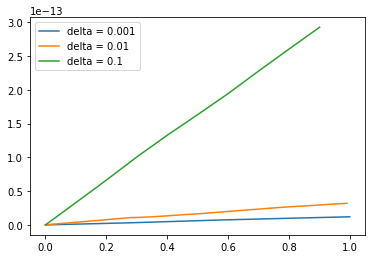

In [10]:
time_interval = 1
for delta in [10**-3, 10**-2, 10**-1]:
    verleSolver = model.VerleSimpleSolver(time_step = delta)
    res_verle = verleSolver.solve(time_interval = time_interval, particles = particles)

    odeintSolver = model.OdeintSolver(time_step = delta)
    res_odeint = odeintSolver.solve(time_interval = time_interval, particles = particles)

    t = np.arange(0, time_interval, delta)
    res = []
    for verle_particles, odeint_particles in zip(res_verle, res_odeint):
        x_s_verle = np.array([p.x for p in verle_particles])
        x_s_odeint = np.array([p.x for p in odeint_particles])
        y_s_verle = np.array([p.y for p in verle_particles])
        y_s_odeint = np.array([p.y for p in odeint_particles])
        res.append(
            np.sqrt(np.linalg.norm(x_s_verle - x_s_odeint)**2 + np.linalg.norm(y_s_verle - y_s_odeint)**2) / len(t)
        )
    plt.plot(t, res, label = "delta = {0}".format(delta))
plt.legend()